# Tools and Examples \- Part 3

## Enumerating allosteric parameters in receptor dimers

This notebook illustrates some of the function definitions contained in `receptor_tools.ipynb`.  


## <span style='color:#ffeb3b'>UNDER CONSTRUCTION</span>



The file `receptor_tools.ipynb` includes the function `enumerate_allosteric_parameters(G)` which takes a graph G and returns the {math}`\kappa` and {math}`\eta` values for a dimer model with the topology of the reduced graph power {math}`G^{(2)}`.  The default method uses {math}`e_1, e_2, \ldots , e_v` while `method='alpha'` gives single digit edge labels \({math}`b,c,\ldots`\).

In [1]:
%%capture
%run receptor_tools.ipynb

Below we will consider a receptor model with the topology of the house graph.  Note that `G=graph.HouseGraph()` constructs a graph `G` with integer vertices.

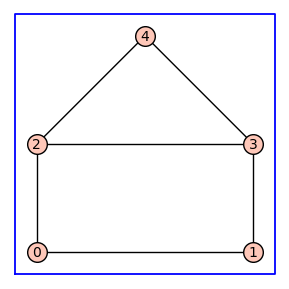

In [2]:
G=graphs.HouseGraph()
G.show(figsize=4,graph_border=True)

The `method = alpha` has replaces the vertices with  monomials.  The spanning tree is constructed with BFS labeling.  KappaEta is a list of lists giving the probability of each state as a symbolic expression which is displayed in LaTeX format.  The polynomial ring `A` has the {math}`\kappa_i` and {math}`\eta_{ij}` as symbolic variables for {math}`0 \leq i,j \leq v-1`.



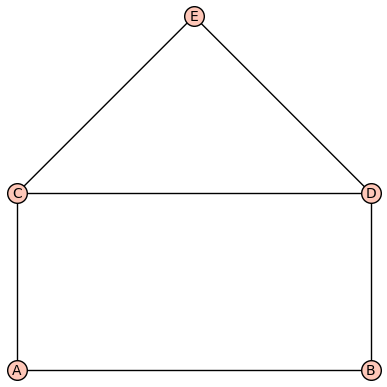

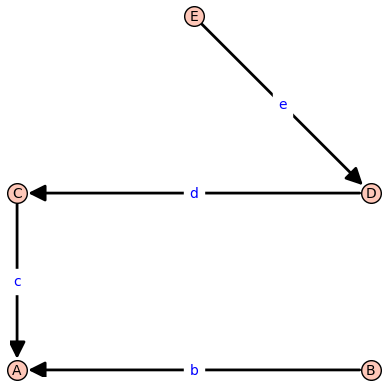

\(1\),\(2 \kappa_{\mathit{b}}\),\(2 \kappa_{\mathit{c}}\),\(2 \kappa_{\mathit{c}} \kappa_{\mathit{d}}\),\(2 \kappa_{\mathit{c}} \kappa_{\mathit{d}} \kappa_{\mathit{e}}\)
\(0\),\(\kappa_{\mathit{b}}^{2} \eta_{\mathit{bb}}\),\(2 \kappa_{\mathit{b}} \kappa_{\mathit{c}} \eta_{\mathit{bc}}\),\(2 \kappa_{\mathit{b}} \kappa_{\mathit{c}} \kappa_{\mathit{d}} \eta_{\mathit{bc}} \eta_{\mathit{bd}}\),\(2 \kappa_{\mathit{b}} \kappa_{\mathit{c}} \kappa_{\mathit{d}} \kappa_{\mathit{e}} \eta_{\mathit{bc}} \eta_{\mathit{bd}} \eta_{\mathit{be}}\)
\(0\),\(0\),\(\kappa_{\mathit{c}}^{2} \eta_{\mathit{cc}}\),\(2 \kappa_{\mathit{c}}^{2} \kappa_{\mathit{d}} \eta_{\mathit{cc}} \eta_{\mathit{cd}}\),\(2 \kappa_{\mathit{c}}^{2} \kappa_{\mathit{d}} \kappa_{\mathit{e}} \eta_{\mathit{cc}} \eta_{\mathit{cd}} \eta_{\mathit{ce}}\)
\(0\),\(0\),\(0\),\(\kappa_{\mathit{c}}^{2} \kappa_{\mathit{d}}^{2} \eta_{\mathit{cc}} \eta_{\mathit{cd}}^{2} \eta_{\mathit{dd}}\),\(2 \kappa_{\mathit{c}}^{2} \kappa_{\mathit{d}}^{2} \kappa_{\mathit{e}} \eta_{\mathit{cc}} \eta_{\mathit{cd}}^{2} \eta_{\mathit{dd}} \eta_{\mathit{ce}} \eta_{\mathit{de}}\)
\(0\),\(0\),\(0\),\(0\),\(\kappa_{\mathit{c}}^{2} \kappa_{\mathit{d}}^{2} \kappa_{\mathit{e}}^{2} \eta_{\mathit{cc}} \eta_{\mathit{cd}}^{2} \eta_{\mathit{dd}} \eta_{\mathit{ce}}^{2} \eta_{\mathit{de}}^{2} \eta_{\mathit{ee}}\)


In [3]:
(G, T, KappaEta, A) = enumerate_allosteric_parameters(G,method='alpha',show=True)

The next example is reminicent of the  [cubic ternary complex model](https://www.sciencedirect.com/science/article/abs/pii/S0022519396900144).  Note that `graphs.GridGraph([2,2,2])` has tuples as vertices.  We use `cannonical_label()` to make the vertices `integers`.  This is necessary because `enumerate_allosteric_parameters()` requires a graph `G` with `integer` vertices.

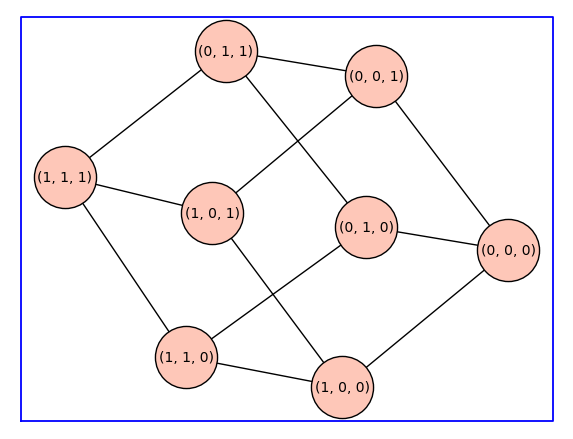

In [4]:
G=graphs.GridGraph([2,2,2])
G.show(figsize=6,graph_border=True,vertex_size=2000)

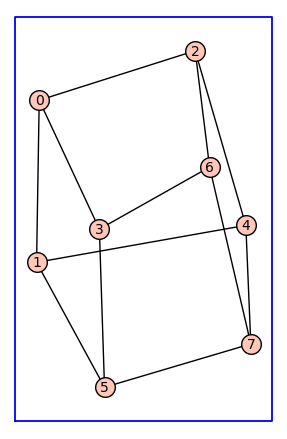

In [5]:
G=G.canonical_label()
G.show(figsize=6,graph_border=True)

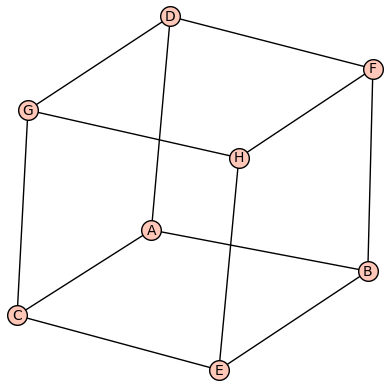

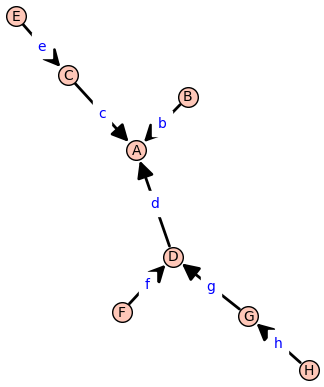

\(1\),\(2 \kappa_{\mathit{b}}\),\(2 \kappa_{\mathit{c}}\),\(2 \kappa_{\mathit{d}}\),\(2 \kappa_{\mathit{c}} \kappa_{\mathit{e}}\),\(2 \kappa_{\mathit{d}} \kappa_{\mathit{f}}\),\(2 \kappa_{\mathit{d}} \kappa_{\mathit{g}}\),\(2 \kappa_{\mathit{d}} \kappa_{\mathit{g}} \kappa_{\mathit{h}}\)
\(0\),\(\kappa_{\mathit{b}}^{2} \eta_{\mathit{bb}}\),\(2 \kappa_{\mathit{b}} \kappa_{\mathit{c}} \eta_{\mathit{bc}}\),\(2 \kappa_{\mathit{b}} \kappa_{\mathit{d}} \eta_{\mathit{bd}}\),\(2 \kappa_{\mathit{b}} \kappa_{\mathit{c}} \kappa_{\mathit{e}} \eta_{\mathit{bc}} \eta_{\mathit{be}}\),\(2 \kappa_{\mathit{b}} \kappa_{\mathit{d}} \kappa_{\mathit{f}} \eta_{\mathit{bd}} \eta_{\mathit{bf}}\),\(2 \kappa_{\mathit{b}} \kappa_{\mathit{d}} \kappa_{\mathit{g}} \eta_{\mathit{bd}} \eta_{\mathit{bg}}\),\(2 \kappa_{\mathit{b}} \kappa_{\mathit{d}} \kappa_{\mathit{g}} \kappa_{\mathit{h}} \eta_{\mathit{bd}} \eta_{\mathit{bg}} \eta_{\mathit{bh}}\)
\(0\),\(0\),\(\kappa_{\mathit{c}}^{2} \eta_{\mathit{cc}}\),\(2 \kappa_{\mathit{c}} \kappa_{\mathit{d}} \eta_{\mathit{cd}}\),\(2 \kappa_{\mathit{c}}^{2} \kappa_{\mathit{e}} \eta_{\mathit{cc}} \eta_{\mathit{ce}}\),\(2 \kappa_{\mathit{c}} \kappa_{\mathit{d}} \kappa_{\mathit{f}} \eta_{\mathit{cd}} \eta_{\mathit{cf}}\),\(2 \kappa_{\mathit{c}} \kappa_{\mathit{d}} \kappa_{\mathit{g}} \eta_{\mathit{cd}} \eta_{\mathit{cg}}\),\(2 \kappa_{\mathit{c}} \kappa_{\mathit{d}} \kappa_{\mathit{g}} \kappa_{\mathit{h}} \eta_{\mathit{cd}} \eta_{\mathit{cg}} \eta_{\mathit{ch}}\)
\(0\),\(0\),\(0\),\(\kappa_{\mathit{d}}^{2} \eta_{\mathit{dd}}\),\(2 \kappa_{\mathit{c}} \kappa_{\mathit{d}} \kappa_{\mathit{e}} \eta_{\mathit{cd}} \eta_{\mathit{de}}\),\(2 \kappa_{\mathit{d}}^{2} \kappa_{\mathit{f}} \eta_{\mathit{dd}} \eta_{\mathit{df}}\),\(2 \kappa_{\mathit{d}}^{2} \kappa_{\mathit{g}} \eta_{\mathit{dd}} \eta_{\mathit{dg}}\),\(2 \kappa_{\mathit{d}}^{2} \kappa_{\mathit{g}} \kappa_{\mathit{h}} \eta_{\mathit{dd}} \eta_{\mathit{dg}} \eta_{\mathit{dh}}\)
\(0\),\(0\),\(0\),\(0\),\(\kappa_{\mathit{c}}^{2} \kappa_{\mathit{e}}^{2} \eta_{\mathit{cc}} \eta_{\mathit{ce}}^{2} \eta_{\mathit{ee}}\),\(2 \kappa_{\mathit{c}} \kappa_{\mathit{d}} \kappa_{\mathit{e}} \kappa_{\mathit{f}} \eta_{\mathit{cd}} \eta_{\mathit{de}} \eta_{\mathit{cf}} \eta_{\mathit{ef}}\),\(2 \kappa_{\mathit{c}} \kappa_{\mathit{d}} \kappa_{\mathit{e}} \kappa_{\mathit{g}} \eta_{\mathit{cd}} \eta_{\mathit{de}} \eta_{\mathit{cg}} \eta_{\mathit{eg}}\),\(2 \kappa_{\mathit{c}} \kappa_{\mathit{d}} \kappa_{\mathit{e}} \kappa_{\mathit{g}} \kappa_{\mathit{h}} \eta_{\mathit{cd}} \eta_{\mathit{de}} \eta_{\mathit{cg}} \eta_{\mathit{eg}} \eta_{\mathit{ch}} \eta_{\mathit{eh}}\)
\(0\),\(0\),\(0\),\(0\),\(0\),\(\kappa_{\mathit{d}}^{2} \kappa_{\mathit{f}}^{2} \eta_{\mathit{dd}} \eta_{\mathit{df}}^{2} \eta_{\mathit{ff}}\),\(2 \kappa_{\mathit{d}}^{2} \kappa_{\mathit{f}} \kappa_{\mathit{g}} \eta_{\mathit{dd}} \eta_{\mathit{df}} \eta_{\mathit{dg}} \eta_{\mathit{fg}}\),\(2 \kappa_{\mathit{d}}^{2} \kappa_{\mathit{f}} \kappa_{\mathit{g}} \kappa_{\mathit{h}} \eta_{\mathit{dd}} \eta_{\mathit{df}} \eta_{\mathit{dg}} \eta_{\mathit{fg}} \eta_{\mathit{dh}} \eta_{\mathit{fh}}\)
\(0\),\(0\),\(0\),\(0\),\(0\),\(0\),\(\kappa_{\mathit{d}}^{2} \kappa_{\mathit{g}}^{2} \eta_{\mathit{dd}} \eta_{\mathit{dg}}^{2} \eta_{\mathit{gg}}\),\(2 \kappa_{\mathit{d}}^{2} \kappa_{\mathit{g}}^{2} \kappa_{\mathit{h}} \eta_{\mathit{dd}} \eta_{\mathit{dg}}^{2} \eta_{\mathit{gg}} \eta_{\mathit{dh}} \eta_{\mathit{gh}}\)
\(0\),\(0\),\(0\),\(0\),\(0\),\(0\),\(0\),\(\kappa_{\mathit{d}}^{2} \kappa_{\mathit{g}}^{2} \kappa_{\mathit{h}}^{2} \eta_{\mathit{dd}} \eta_{\mathit{dg}}^{2} \eta_{\mathit{gg}} \eta_{\mathit{dh}}^{2} \eta_{\mathit{gh}}^{2} \eta_{\mathit{hh}}\)


In [6]:
(G, T, KappaEta, A) = enumerate_allosteric_parameters(G,method='alpha',show=True)

An example of a receptor model with more states.  Using `show=False` suppresses the output.  One can still work with the ring `A`, show the BFS spanning tree, and list the probability of each state.

In [7]:
(G, T, KappaEta, A) = enumerate_allosteric_parameters(graphs.PetersenGraph(),method='integer',show=False)

In [8]:
A.inject_variables()

Defining kappa_1, kappa_2, kappa_3, kappa_4, kappa_5, kappa_6, kappa_7, kappa_8, kappa_9, eta_11, eta_12, eta_22, eta_13, eta_23, eta_33, eta_14, eta_24, eta_34, eta_44, eta_15, eta_25, eta_35, eta_45, eta_55, eta_16, eta_26, eta_36, eta_46, eta_56, eta_66, eta_17, eta_27, eta_37, eta_47, eta_57, eta_67, eta_77, eta_18, eta_28, eta_38, eta_48, eta_58, eta_68, eta_78, eta_88, eta_19, eta_29, eta_39, eta_49, eta_59, eta_69, eta_79, eta_89, eta_99


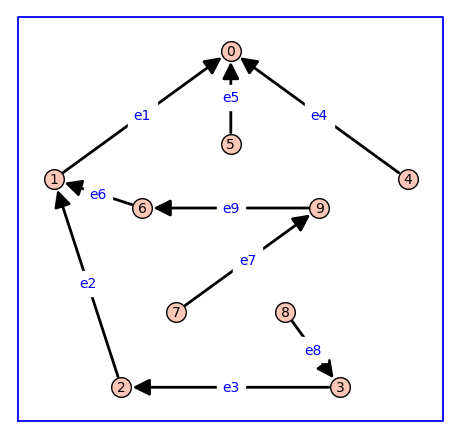

In [9]:
T.show(figsize=6,graph_border=True,edge_labels=True)

In [10]:
from IPython.display import display, Math
for i,k in enumerate(flatten(KappaEta)):
    if k != 0:
        display(Math(latex(i)+':'+latex(k)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>